### Creating coverage plot for the CNV of interest on UPD-chr14  

We ran bedtools coverage on our samples for all the regions of interest from the original Giomar study.  
We then select the area of interest and divide each coverage per base by the median coverage of the sample.  
Finally we plot.  
  
##### Sample of interest: 17NR2154  
##### Documentation: https://docs.google.com/document/d/1GeXF5oqFV3XYbwfBYnEJ6E3xbnLZsVvy-jaqQVMng7I/edit#heading=h.av9cy1khsnvs  
##### Trello card: https://trello.com/c/y1j3dXWq/56-cnvs-normalization-using-median-os-coverage-for-each-sample-miguel-gonzalezs-suggestion  

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
plt.style.use('seaborn-colorblind')
sns.set_style('darkgrid')

In [2]:
# Read coverage per base file and add column names to the file
header = ["chr", "start", "end", "feature", "base", "17NR2122", "17NR2123", 
          "17NR2124", "17NR2125", "17NR2126", "17NR2127", "17NR2128", "17NR2129", 
          "17NR2130", "17NR2131", "17NR2132", "17NR2133", "17NR2134", "17NR2135", 
          "17NR2136", "17NR2137", "17NR2138", "17NR2139", "17NR2140", "17NR2141", 
          "17NR2142", "17NR2143", "17NR2144", "17NR2145", "17NR2146", "17NR2147", 
          "17NR2148", "17NR2149", "17NR2150", "17NR2151", "17NR2152", "17NR2153", 
          "17NR2154"]
df = pd.read_csv("./pasted_coverages.tsv", sep="\t", names=header, index_col=False)
df.head()

,chr,start,end,feature,base,17NR2122,17NR2123,17NR2124,17NR2125,17NR2126,...,17NR2145,17NR2146,17NR2147,17NR2148,17NR2149,17NR2150,17NR2151,17NR2152,17NR2153,17NR2154
0,11,2011230,2921230,SRS,1,42,19,78,62,34,...,46,59,41,44,44,40,54,42,53,44
1,11,2011230,2921230,SRS,2,46,19,78,64,34,...,46,60,41,44,46,40,54,42,54,46
2,11,2011230,2921230,SRS,3,46,19,79,65,34,...,47,61,42,45,47,42,54,42,56,47
3,11,2011230,2921230,SRS,4,47,19,81,67,34,...,48,61,44,47,48,46,55,43,57,49
4,11,2011230,2921230,SRS,5,49,20,85,69,34,...,48,62,46,48,48,46,59,44,60,49


In [3]:
list_samples = ["17NR2122", "17NR2123", "17NR2124", "17NR2125", 
                "17NR2126", "17NR2127", "17NR2128", "17NR2129", "17NR2130", 
                "17NR2131", "17NR2132", "17NR2133", "17NR2134", "17NR2135", 
                "17NR2136", "17NR2137", "17NR2138", "17NR2139", "17NR2140", 
                "17NR2141", "17NR2142", "17NR2143", "17NR2144", "17NR2145", 
                "17NR2146", "17NR2147", "17NR2148", "17NR2149", "17NR2150", 
                "17NR2151", "17NR2152", "17NR2153", "17NR2154"]

In [4]:
for elem in list_samples:
    df[elem] = df[elem]/df[elem].median()

df["mean"] = df.loc[:, list_samples].mean(axis=1)
df["mean"] = df["mean"]/df["mean"].median()
list_samples = list_samples + ["mean"]

df.head()

,chr,start,end,feature,base,17NR2122,17NR2123,17NR2124,17NR2125,17NR2126,...,17NR2146,17NR2147,17NR2148,17NR2149,17NR2150,17NR2151,17NR2152,17NR2153,17NR2154,mean
0,11,2011230,2921230,SRS,1,0.240000,0.191919,0.349776,0.314721,0.280992,...,0.345029,0.241176,0.255814,0.283871,0.207254,0.246575,0.254545,0.259804,0.255814,0.257273
1,11,2011230,2921230,SRS,2,0.262857,0.191919,0.349776,0.324873,0.280992,...,0.350877,0.241176,0.255814,0.296774,0.207254,0.246575,0.254545,0.264706,0.267442,0.260921
2,11,2011230,2921230,SRS,3,0.262857,0.191919,0.354260,0.329949,0.280992,...,0.356725,0.247059,0.261628,0.303226,0.217617,0.246575,0.254545,0.274510,0.273256,0.265660
3,11,2011230,2921230,SRS,4,0.268571,0.191919,0.363229,0.340102,0.280992,...,0.356725,0.258824,0.273256,0.309677,0.238342,0.251142,0.260606,0.279412,0.284884,0.274252
4,11,2011230,2921230,SRS,5,0.280000,0.202020,0.381166,0.350254,0.280992,...,0.362573,0.270588,0.279070,0.309677,0.238342,0.269406,0.266667,0.294118,0.284884,0.282660


In [5]:
dfg = df.loc[df['feature'].map(str) == "UPD"].reset_index(drop=True).head(130000)


dfg.head()

,chr,start,end,feature,base,17NR2122,17NR2123,17NR2124,17NR2125,17NR2126,...,17NR2146,17NR2147,17NR2148,17NR2149,17NR2150,17NR2151,17NR2152,17NR2153,17NR2154,mean
0,14,101191337,102032337,UPD,1,0.805714,0.949495,0.959641,0.664975,0.884298,...,0.859649,0.976471,1.023256,0.812903,0.761658,0.958904,0.824242,1.098039,0.540698,0.906682
1,14,101191337,102032337,UPD,2,0.822857,0.969697,0.968610,0.690355,0.900826,...,0.894737,0.982353,1.040698,0.864516,0.777202,0.986301,0.848485,1.107843,0.558140,0.924284
2,14,101191337,102032337,UPD,3,0.828571,0.979798,0.982063,0.690355,0.900826,...,0.900585,0.988235,1.046512,0.877419,0.803109,1.018265,0.860606,1.127451,0.581395,0.937561
3,14,101191337,102032337,UPD,4,0.840000,0.989899,0.982063,0.710660,0.909091,...,0.912281,0.994118,1.069767,0.896774,0.808290,1.054795,0.878788,1.137255,0.593023,0.954938
4,14,101191337,102032337,UPD,5,0.851429,1.000000,0.995516,0.725888,0.917355,...,0.929825,1.011765,1.098837,0.929032,0.834197,1.068493,0.890909,1.147059,0.598837,0.973695


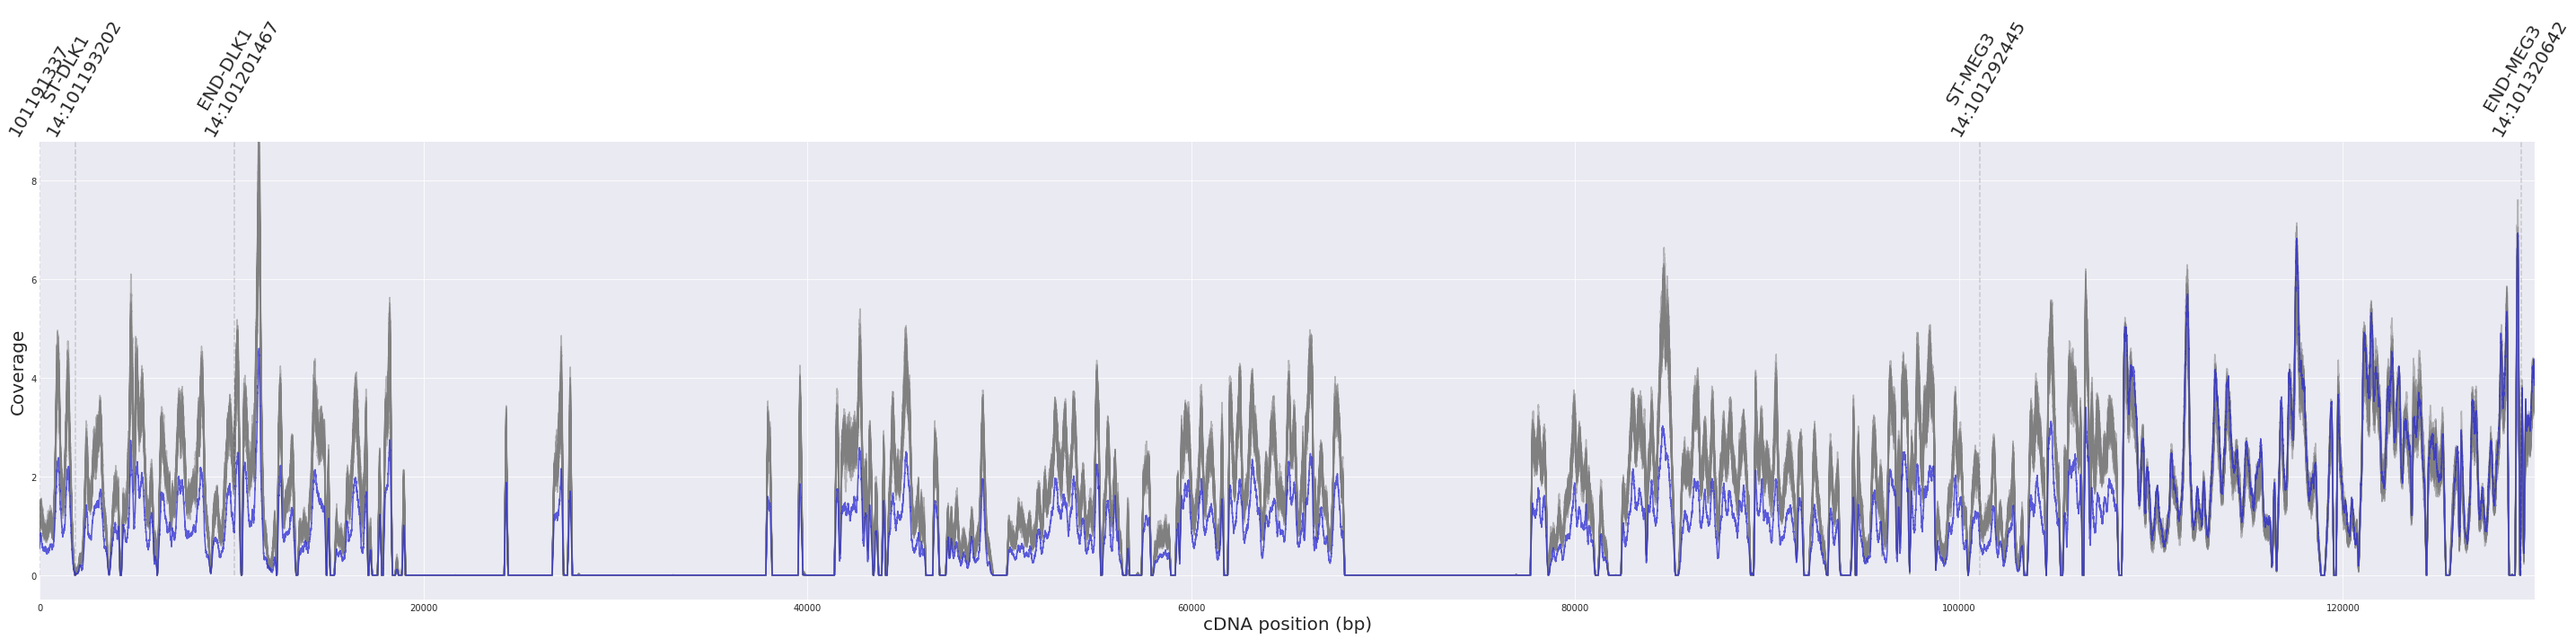

In [10]:
# Create a dataframe per gene
#ab["mean"] = ab.loc[:, list_samples].mean(axis=1)
#dfg = ab.copy()

#dfg = ab.loc[ab['feature'].map(str) == "UPD"].reset_index(drop=True)
dfg["index"] = dfg.index

    # Create a plot per gene
fig = plt.figure(figsize=(40,10))
ax1 = fig.add_subplot(111)
for el in list_samples:
    ax1.plot(dfg['index'], dfg[el], alpha=0.5, color='gray')
ax1.plot(dfg['index'], dfg['17NR2154'], alpha=0.5, color='blue')
    # Plot limits
ax1.set_ylim(-0.5, dfg['mean'].max() + 1)
ax1.set_xlim(0, dfg['index'].max() + 1)
#ax1.set_xlim(105000, dfg['index'].max() + 1)
    #ax1.hlines(y=20, xmin=ax1.get_xlim()[0], xmax=ax1.get_xlim()[-1], color='r')

    # Getting positions to plot vertical lines separating exons
index_positions = [0, 1865, 10130, 101108, 129306]
names = ['101191337', 'ST-DLK1\n14:101193202', 'END-DLK1\n14:101201467', 'ST-MEG3\n14:101292445', 'END-MEG3\n14:101320642']
        
    # Set limits for the vertical lines, it is a plot on top of a plot
ax2 = ax1.twiny()
ax2.set_ylim(ax1.get_ylim())
ax2.set_xlim(ax1.get_xlim())

    # Paint vertical lines, we use [1:] because the first point is always zero
ax2.vlines(x=index_positions, ymin=0, ymax=ax2.get_ylim()[1], linestyle='--', 
            alpha=0.15)
ax2.grid(b=False)
ax2.set_xticks(index_positions)
ax2.set_xticklabels(names, rotation=60, minor=False, fontsize=20)

ax1.set_xlabel('cDNA position (bp)', fontsize=20)
ax1.set_ylabel('Coverage', fontsize=20)

dfg.head()

fig.tight_layout()
#figname = "{}_pbcov.png".format(gene)
figname = "DLK1-17NR2154.png"
fig.savefig(os.path.join("./", figname))
plt.show()
plt.close(fig)

## Use zscore to normalize and plot

In [14]:
cd = df.copy()

c = cd[list_samples].apply(zscore)
for el in list_samples:
    cd[el] = c[el]

for e in list_samples:
    cd[e] = cd[e] - cd["mean"]

cd = cd.loc[cd['feature'].map(str) == "UPD"].reset_index(drop=True).head(130000)
    
cd.head()

,chr,start,end,feature,base,17NR2122,17NR2123,17NR2124,17NR2125,17NR2126,...,17NR2146,17NR2147,17NR2148,17NR2149,17NR2150,17NR2151,17NR2152,17NR2153,17NR2154,mean
0,14,101191337,102032337,UPD,1,-0.052765,0.044247,0.046937,-0.154957,-0.018722,...,-0.039113,0.035393,0.051797,-0.064872,-0.107094,0.043535,-0.072991,0.105489,-0.229160,0.0
1,14,101191337,102032337,UPD,2,-0.052259,0.046565,0.041739,-0.149921,-0.019662,...,-0.030161,0.027804,0.051057,-0.043938,-0.109006,0.050389,-0.070030,0.100202,-0.230118,0.0
2,14,101191337,102032337,UPD,3,-0.056804,0.044875,0.042290,-0.158367,-0.028108,...,-0.035249,0.022964,0.046096,-0.044351,-0.101979,0.063003,-0.071397,0.103574,-0.224913,0.0
3,14,101191337,102032337,UPD,4,-0.060055,0.040579,0.031236,-0.156434,-0.034033,...,-0.039586,0.015518,0.048985,-0.043356,-0.109938,0.076018,-0.071832,0.098429,-0.229141,0.0
4,14,101191337,102032337,UPD,5,-0.064184,0.035404,0.028302,-0.158626,-0.040836,...,-0.041443,0.014408,0.054481,-0.035206,-0.106396,0.073112,-0.076684,0.092407,-0.237660,0.0


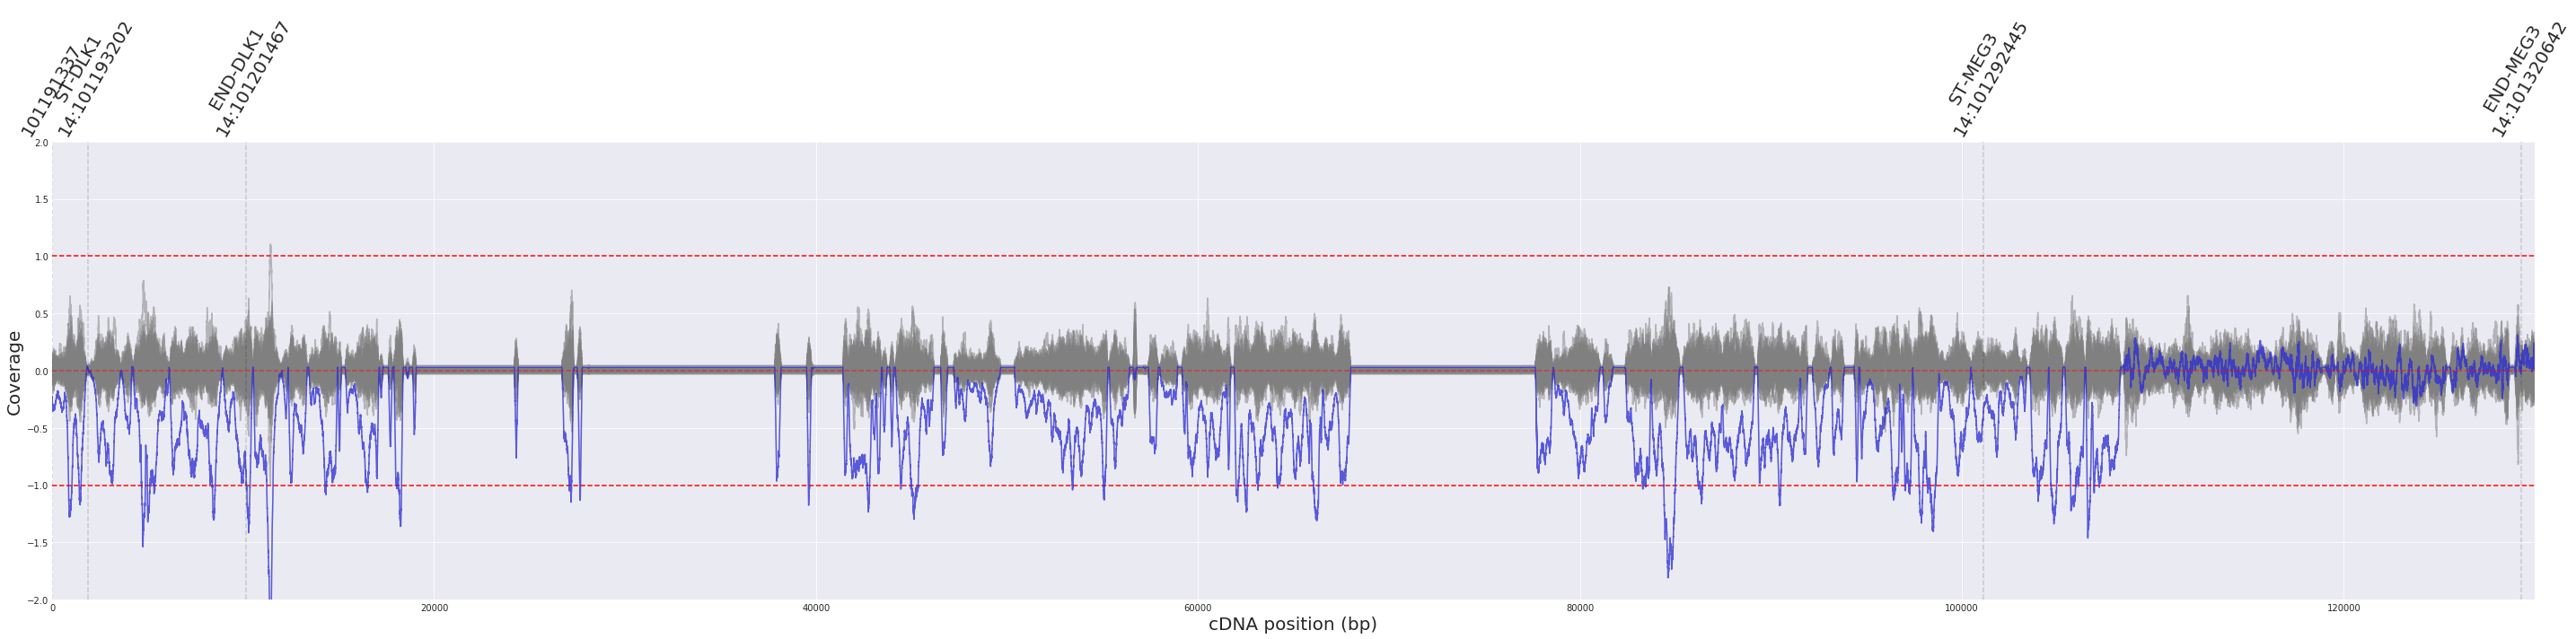

In [18]:
# Create a dataframe per gene
#ab["mean"] = ab.loc[:, list_samples].mean(axis=1)
#dfg = ab.copy()

#dfg = ab.loc[ab['feature'].map(str) == "UPD"].reset_index(drop=True)
cd["index"] = cd.index

    # Create a plot per gene
fig = plt.figure(figsize=(40,10))
ax1 = fig.add_subplot(111)
for el in list_samples:
    ax1.plot(cd['index'], cd[el], alpha=0.5, color='gray')
ax1.plot(cd['index'], cd['17NR2154'], alpha=0.5, color='blue')
ax1.plot(cd["index"], cd["mean"], alpha=0.5, color='r', linestyle='--')
    # Plot limits
ax1.set_ylim(-2, 2)
ax1.set_xlim(0, cd['index'].max() + 1)
#ax1.set_xlim(105000, dfg['index'].max() + 1)
ax1.hlines(y=1, xmin=ax1.get_xlim()[0], xmax=ax1.get_xlim()[-1], color='r', linestyle='--')
ax1.hlines(y=-1, xmin=ax1.get_xlim()[0], xmax=ax1.get_xlim()[-1], color='r', linestyle='--')

    # Getting positions to plot vertical lines separating exons
index_positions = [0, 1865, 10130, 101108, 129306]
names = ['101191337', 'ST-DLK1\n14:101193202', 'END-DLK1\n14:101201467', 'ST-MEG3\n14:101292445', 'END-MEG3\n14:101320642']
        
    # Set limits for the vertical lines, it is a plot on top of a plot
ax2 = ax1.twiny()
ax2.set_ylim(ax1.get_ylim())
ax2.set_xlim(ax1.get_xlim())

    # Paint vertical lines, we use [1:] because the first point is always zero
ax2.vlines(x=index_positions, ymin=-2, ymax=ax2.get_ylim()[1], linestyle='--', 
            alpha=0.15)
ax2.grid(b=False)
ax2.set_xticks(index_positions)
ax2.set_xticklabels(names, rotation=60, minor=False, fontsize=20)

ax1.set_xlabel('cDNA position (bp)', fontsize=20)
ax1.set_ylabel('Coverage', fontsize=20)



fig.tight_layout()
#figname = "{}_pbcov.png".format(gene)
figname = "DLK1-17NR2154-zscore.png"
fig.savefig(os.path.join("./", figname))
plt.show()
plt.close(fig)

## Test using total number of reads

In [73]:
dfa = df.loc[:, ["chr", "start", "end", "feature", "base", "17NR2153", "17NR2154"]]
list_short = ["17NR2153", "17NR2154"]
dfa.head()

,chr,start,end,feature,base,17NR2153,17NR2154
0,11,2011230,2921230,SRS,1,53,44
1,11,2011230,2921230,SRS,2,54,46
2,11,2011230,2921230,SRS,3,56,47
3,11,2011230,2921230,SRS,4,57,49
4,11,2011230,2921230,SRS,5,60,49


In [78]:
dic_total_reads = {"17NR2122":6794137, "17NR2123":3870331, "17NR2124":8761807, "17NR2125":7956425, 
                "17NR2126":4976172, "17NR2127":2399678, "17NR2128":5845975, "17NR2129":7520553, "17NR2130":7544035, 
                "17NR2131":8224731, "17NR2132":6843457, "17NR2133":6604556, "17NR2134":7510350, "17NR2135":7016579, 
                "17NR2136":8359478, "17NR2137":7663546, "17NR2138":9244365, "17NR2139":7487638, "17NR2140":8640616, 
                "17NR2141":7406296, "17NR2142":5602032, "17NR2143":7164379, "17NR2144":7068970, "17NR2145":9307389,
                "17NR2146":7300131, "17NR2147":7013634, "17NR2148":7278219, 
                   "17NR2149":6378808, "17NR2150":8210828, "17NR2151":8707031, 
                   "17NR2152":7102156, "17NR2153":8520552, "17NR2154":7290042}

In [75]:
for elem in list_short:
    dfa[elem] = (dfa[elem]/dic_total_reads[elem])*10**5

dfa.head()

,chr,start,end,feature,base,17NR2153,17NR2154
0,11,2011230,2921230,SRS,1,0.622025,0.603563
1,11,2011230,2921230,SRS,2,0.633762,0.630998
2,11,2011230,2921230,SRS,3,0.657234,0.644715
3,11,2011230,2921230,SRS,4,0.668971,0.672150
4,11,2011230,2921230,SRS,5,0.704180,0.672150


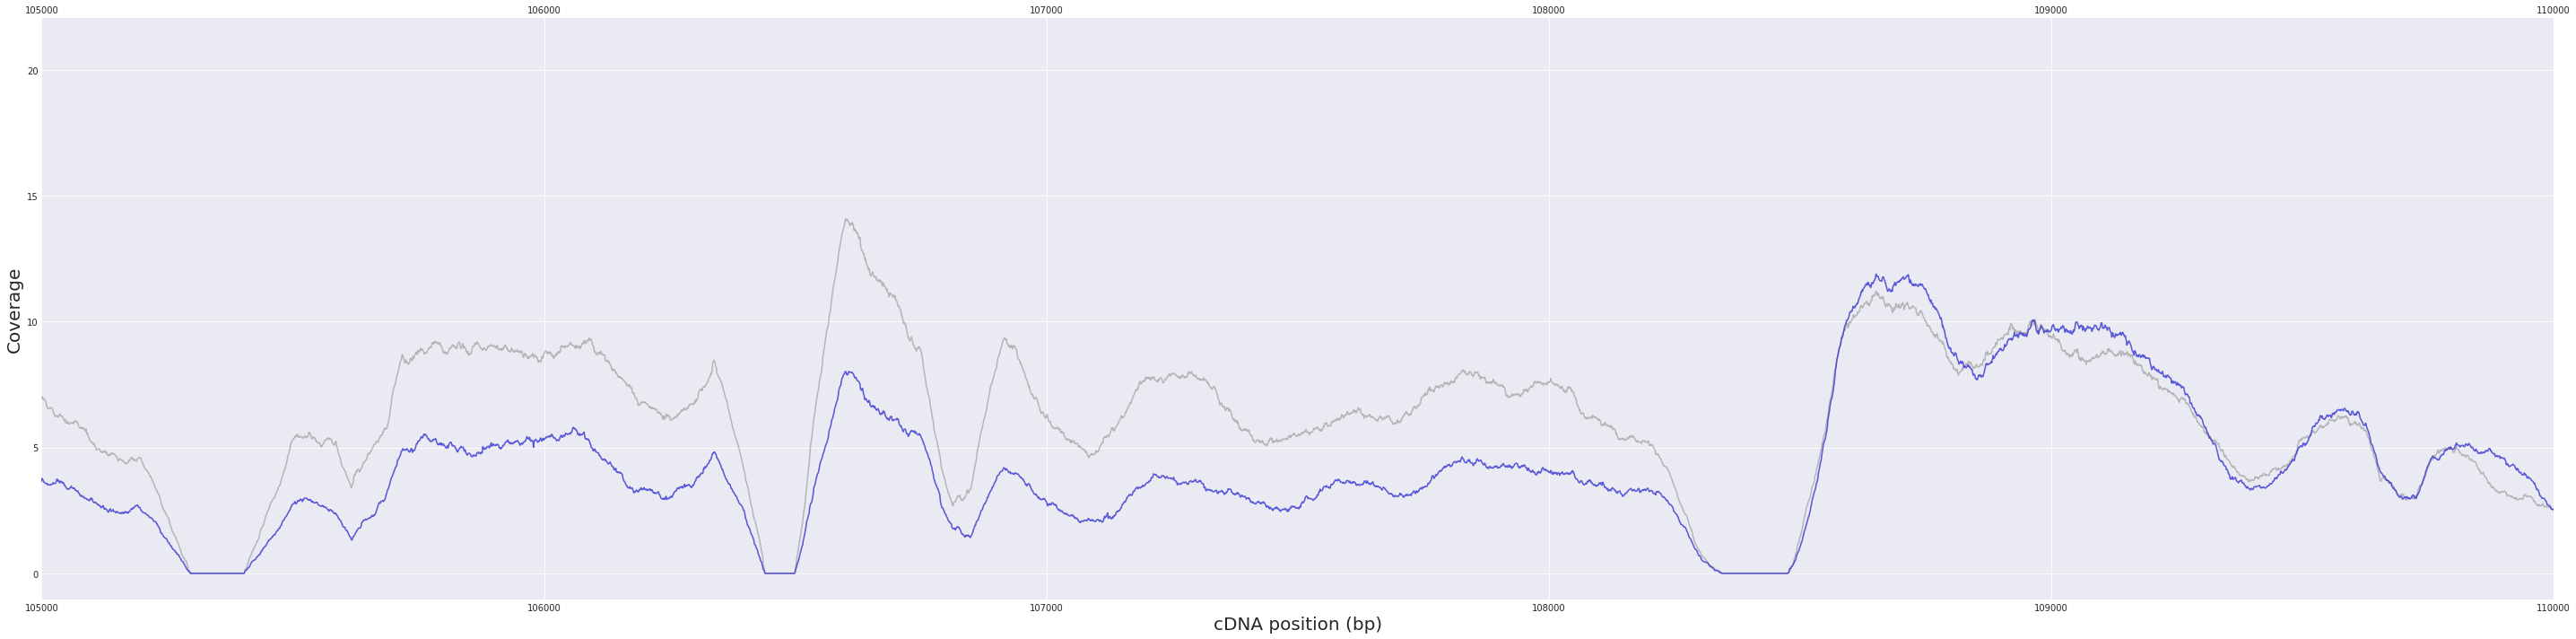

In [77]:
dfa = dfa.loc[dfa['feature'].map(str) == "UPD"].reset_index(drop=True).head(130000)

dfa["index"] = dfa.index

    # Create a plot per gene
fig = plt.figure(figsize=(40,10))
ax1 = fig.add_subplot(111)
for el in list_short:
    ax1.plot(dfa['index'], dfa[el], alpha=0.5, color='gray')
ax1.plot(dfa['index'], dfa['17NR2154'], alpha=0.5, color='blue')
    # Plot limits
#ax1.set_ylim(-0.5, dfa['mean'].max() + 1)
#ax1.set_xlim(0, dfa['index'].max() + 1)
ax1.set_xlim(105000, 110000)

ax1.set_xlabel('cDNA position (bp)', fontsize=20)
ax1.set_ylabel('Coverage', fontsize=20)

dfg.head()

fig.tight_layout()
#figname = "{}_pbcov.png".format(gene)
figname = "DLK1-17NR2154-numReads.png"
fig.savefig(os.path.join("./", figname))
plt.show()
plt.close(fig)

## Do total number of reads for all samples

In [4]:
dff = df.copy()

In [5]:
dic_total_reads = {"17NR2122":6794137, "17NR2123":3870331, "17NR2124":8761807, "17NR2125":7956425, 
                   "17NR2126":4976172, "17NR2127":2399678, "17NR2128":5845975, "17NR2129":7520553, 
                   "17NR2130":7544035, "17NR2131":8224731, "17NR2132":6843457, "17NR2133":6604556, 
                   "17NR2134":7510350, "17NR2135":7016579, "17NR2136":8359478, "17NR2137":7663546, 
                   "17NR2138":9244365, "17NR2139":7487638, "17NR2140":8640616, "17NR2141":7406296, 
                   "17NR2142":5602032, "17NR2143":7164379, "17NR2144":7068970, "17NR2145":9307389,
                   "17NR2146":7300131, "17NR2147":7013634, "17NR2148":7278219, "17NR2149":6378808, 
                   "17NR2150":8210828, "17NR2151":8707031, "17NR2152":7102156, "17NR2153":8520552, 
                   "17NR2154":7290042}
list_samples = ["17NR2122", "17NR2123", "17NR2124", "17NR2125", 
                "17NR2126", "17NR2127", "17NR2128", "17NR2129", "17NR2130", 
                "17NR2131", "17NR2132", "17NR2133", "17NR2134", "17NR2135", 
                "17NR2136", "17NR2137", "17NR2138", "17NR2139", "17NR2140", 
                "17NR2141", "17NR2142", "17NR2143", "17NR2144", "17NR2145", 
                "17NR2146", "17NR2147", "17NR2148", "17NR2149", "17NR2150", 
                "17NR2151", "17NR2152", "17NR2153", "17NR2154"]

In [6]:
for elem in list_samples:
    dff[elem] = (dff[elem]/dic_total_reads[elem])*10**5

dff["mean"] = dff.loc[:, list_samples].mean(axis=1)
list_samples = list_samples + ["mean"]

dff.head()

,chr,start,end,feature,base,17NR2122,17NR2123,17NR2124,17NR2125,17NR2126,...,17NR2146,17NR2147,17NR2148,17NR2149,17NR2150,17NR2151,17NR2152,17NR2153,17NR2154,mean
0,11,2011230,2921230,SRS,1,0.618180,0.490914,0.890227,0.779244,0.683256,...,0.808205,0.584576,0.604544,0.689784,0.487162,0.620188,0.59137,0.622025,0.603563,0.635877
1,11,2011230,2921230,SRS,2,0.677054,0.490914,0.890227,0.804381,0.683256,...,0.821903,0.584576,0.604544,0.721138,0.487162,0.620188,0.59137,0.633762,0.630998,0.644998
2,11,2011230,2921230,SRS,3,0.677054,0.490914,0.901640,0.816950,0.683256,...,0.835601,0.598834,0.618283,0.736815,0.511520,0.620188,0.59137,0.657234,0.644715,0.656637
3,11,2011230,2921230,SRS,4,0.691773,0.490914,0.924467,0.842087,0.683256,...,0.835601,0.627350,0.645762,0.752492,0.560236,0.631673,0.60545,0.668971,0.672150,0.678003
4,11,2011230,2921230,SRS,5,0.721210,0.516752,0.970120,0.867224,0.683256,...,0.849300,0.655865,0.659502,0.752492,0.560236,0.677613,0.61953,0.704180,0.672150,0.698876


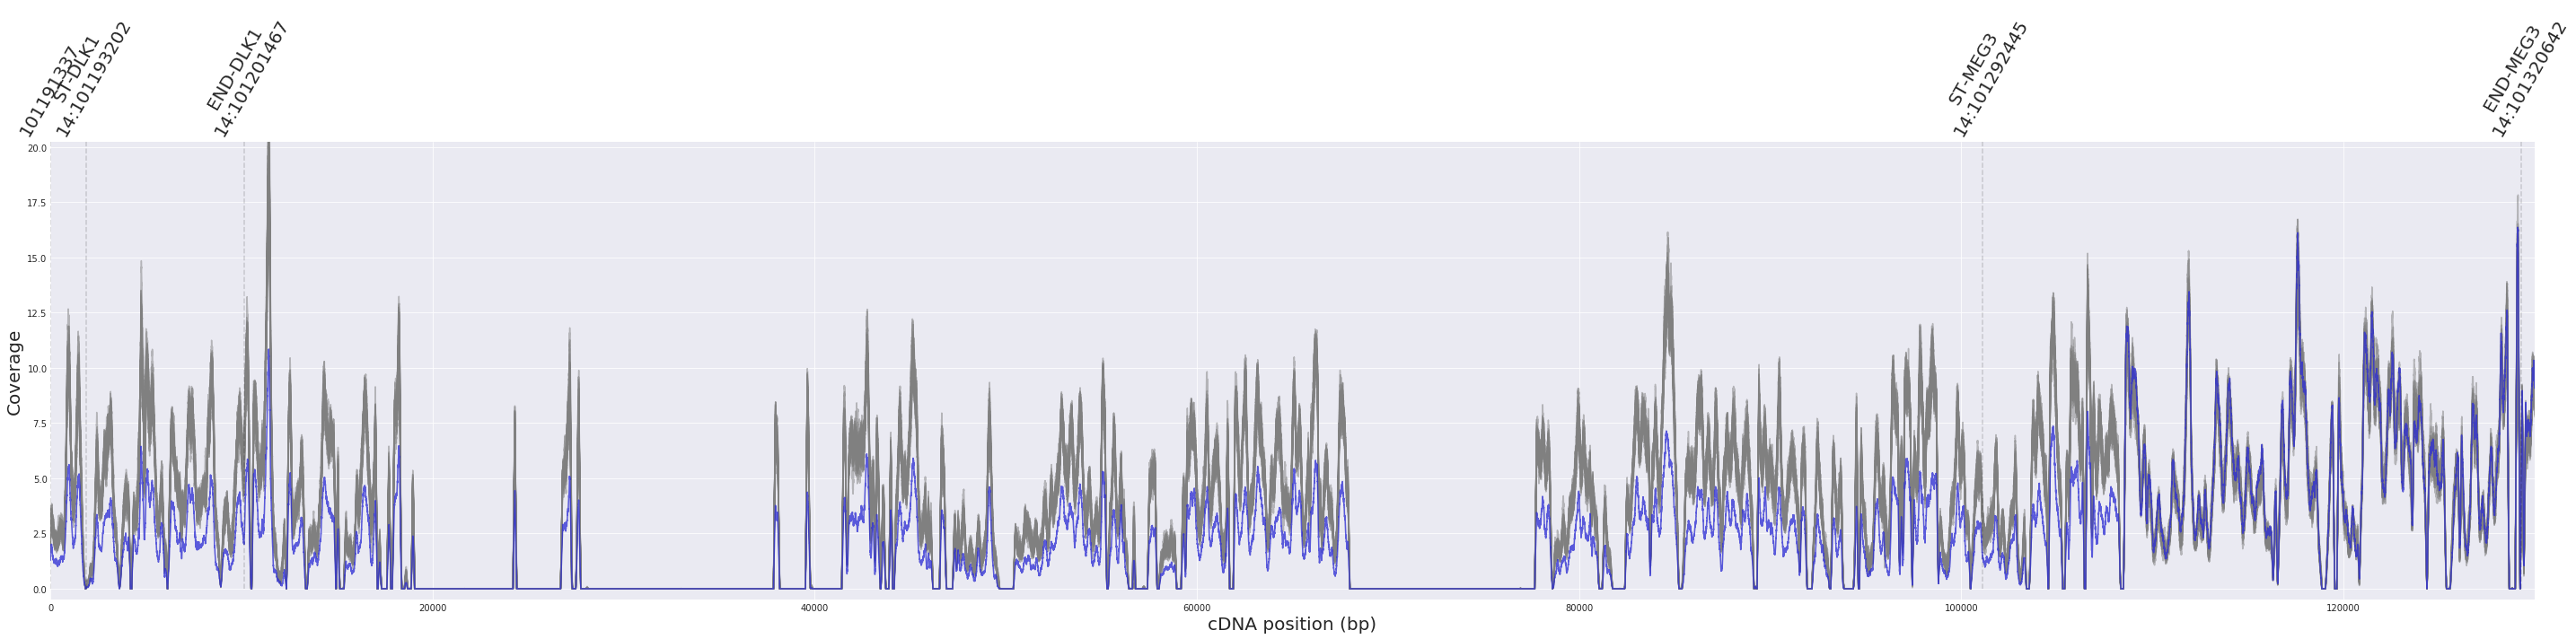

In [88]:
# Create a dataframe per gene
#ab["mean"] = ab.loc[:, list_samples].mean(axis=1)
#dfg = ab.copy()
dff = dff.loc[dff['feature'].map(str) == "UPD"].reset_index(drop=True).head(130000)
#dfg = ab.loc[ab['feature'].map(str) == "UPD"].reset_index(drop=True)
dff["index"] = dff.index

    # Create a plot per gene
fig = plt.figure(figsize=(40,10))
ax1 = fig.add_subplot(111)
for el in list_samples:
    ax1.plot(dff['index'], dff[el], alpha=0.5, color='gray')
ax1.plot(dff['index'], dff['17NR2154'], alpha=0.5, color='blue')
    # Plot limits
ax1.set_ylim(-0.5, dff['mean'].max() + 1)
ax1.set_xlim(0, dff['index'].max() + 1)
#ax1.set_xlim(105000, 110000)
    #ax1.hlines(y=20, xmin=ax1.get_xlim()[0], xmax=ax1.get_xlim()[-1], color='r')

    # Getting positions to plot vertical lines separating exons
index_positions = [0, 1865, 10130, 101108, 129306]
names = ['101191337', 'ST-DLK1\n14:101193202', 'END-DLK1\n14:101201467', 'ST-MEG3\n14:101292445', 'END-MEG3\n14:101320642']
        
    # Set limits for the vertical lines, it is a plot on top of a plot
ax2 = ax1.twiny()
ax2.set_ylim(ax1.get_ylim())
ax2.set_xlim(ax1.get_xlim())

    # Paint vertical lines, we use [1:] because the first point is always zero
ax2.vlines(x=index_positions, ymin=0, ymax=ax2.get_ylim()[1], linestyle='--', 
            alpha=0.15)
ax2.grid(b=False)
ax2.set_xticks(index_positions)
ax2.set_xticklabels(names, rotation=60, minor=False, fontsize=20)

ax1.set_xlabel('cDNA position (bp)', fontsize=20)
ax1.set_ylabel('Coverage', fontsize=20)

dfg.head()

fig.tight_layout()
#figname = "{}_pbcov.png".format(gene)
figname = "DLK1-17NR2154-numReads.png"
fig.savefig(os.path.join("./", figname))
plt.show()
plt.close(fig)

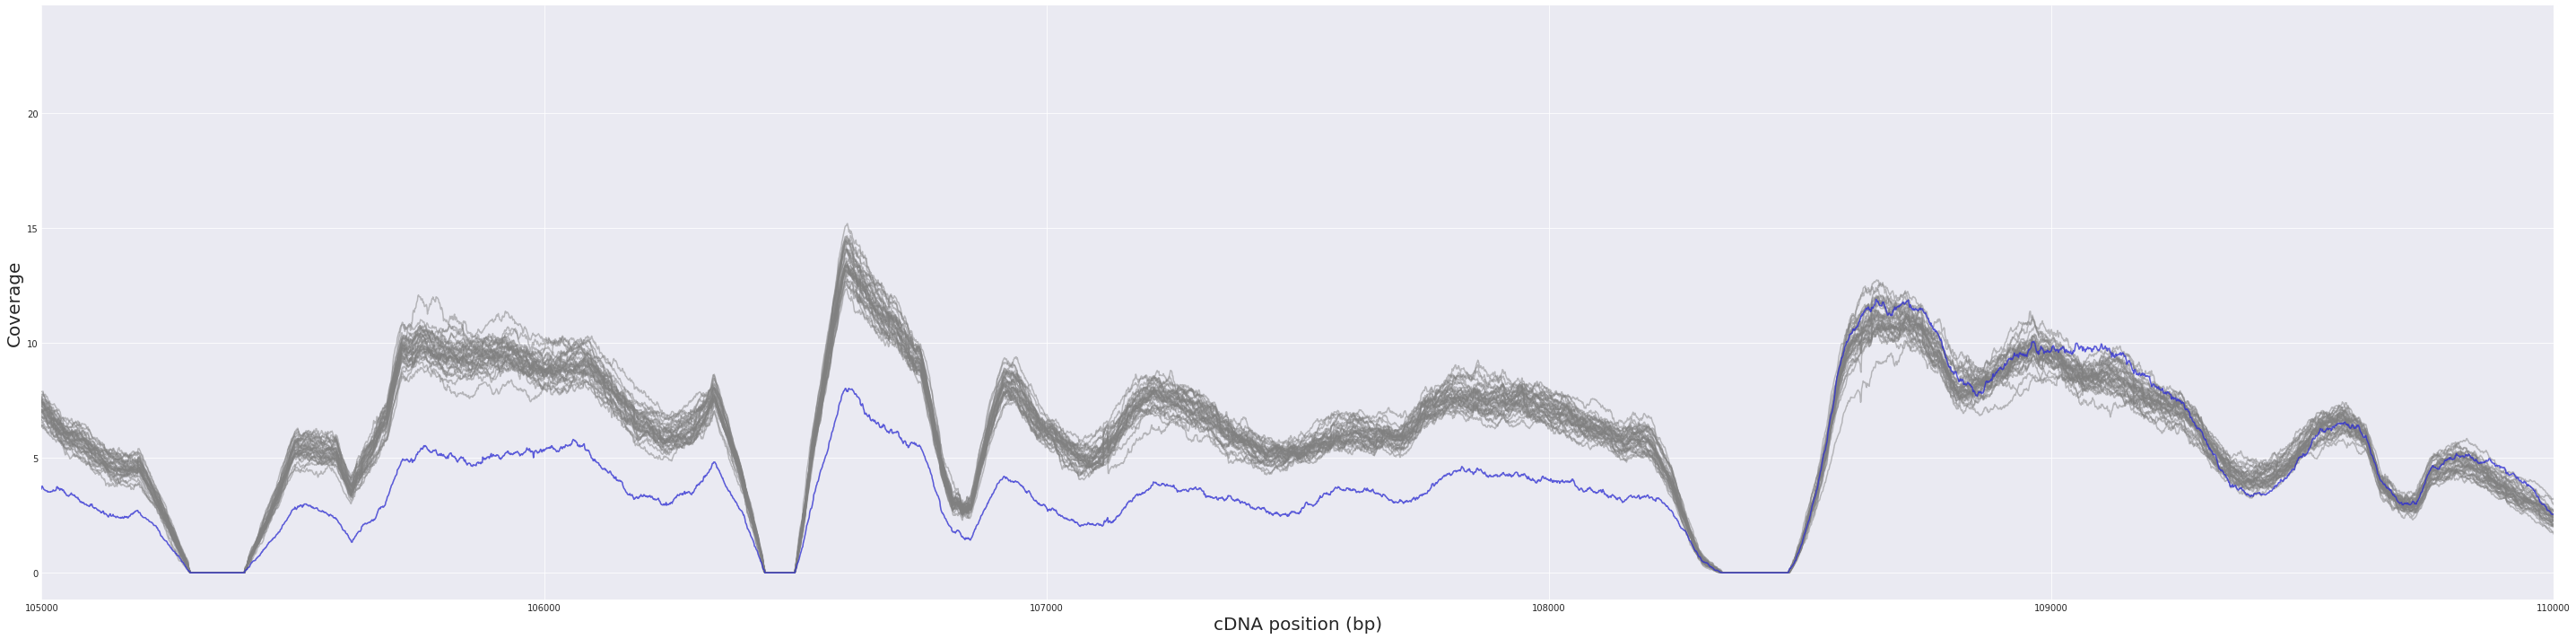

In [89]:
## Zoomed into the breakingpoint
dff["index"] = dff.index

    # Create a plot per gene
fig = plt.figure(figsize=(40,10))
ax1 = fig.add_subplot(111)
for el in list_samples:
    ax1.plot(dff['index'], dff[el], alpha=0.5, color='gray')
ax1.plot(dff['index'], dff['17NR2154'], alpha=0.5, color='blue')
    # Plot limits
ax1.set_xlim(105000, 110000)

ax1.set_xlabel('cDNA position (bp)', fontsize=20)
ax1.set_ylabel('Coverage', fontsize=20)

dfg.head()

fig.tight_layout()
figname = "DLK1-17NR2154-numReads-zoomed.png"
fig.savefig(os.path.join("./", figname))
plt.show()
plt.close(fig)

In [7]:
# Now with zscore
c = dff[list_samples].apply(zscore)
for el in list_samples:
    dff[el] = c[el]

for e in list_samples:
    dff[e] = dff[e] - dff["mean"]

dff = dff.loc[dff['feature'].map(str) == "UPD"].reset_index(drop=True).head(130000)
    
dff.head()

,chr,start,end,feature,base,17NR2122,17NR2123,17NR2124,17NR2125,17NR2126,...,17NR2146,17NR2147,17NR2148,17NR2149,17NR2150,17NR2151,17NR2152,17NR2153,17NR2154,mean
0,14,101191337,102032337,UPD,1,-0.053306,0.043706,0.046396,-0.155498,-0.019263,...,-0.039655,0.034852,0.051256,-0.065413,-0.107635,0.042994,-0.073532,0.104948,-0.229701,0.0
1,14,101191337,102032337,UPD,2,-0.052766,0.046058,0.041232,-0.150428,-0.020169,...,-0.030668,0.027296,0.050550,-0.044445,-0.109513,0.049882,-0.070537,0.099695,-0.230625,0.0
2,14,101191337,102032337,UPD,3,-0.057308,0.044371,0.041785,-0.158871,-0.028612,...,-0.035753,0.022460,0.045592,-0.044856,-0.102483,0.062499,-0.071901,0.103069,-0.225417,0.0
3,14,101191337,102032337,UPD,4,-0.060552,0.040081,0.030739,-0.156932,-0.034531,...,-0.040084,0.015021,0.048488,-0.043853,-0.110435,0.075520,-0.072329,0.097932,-0.229638,0.0
4,14,101191337,102032337,UPD,5,-0.064657,0.034931,0.027830,-0.159099,-0.041309,...,-0.041916,0.013935,0.054009,-0.035678,-0.106869,0.072639,-0.077157,0.091934,-0.238132,0.0


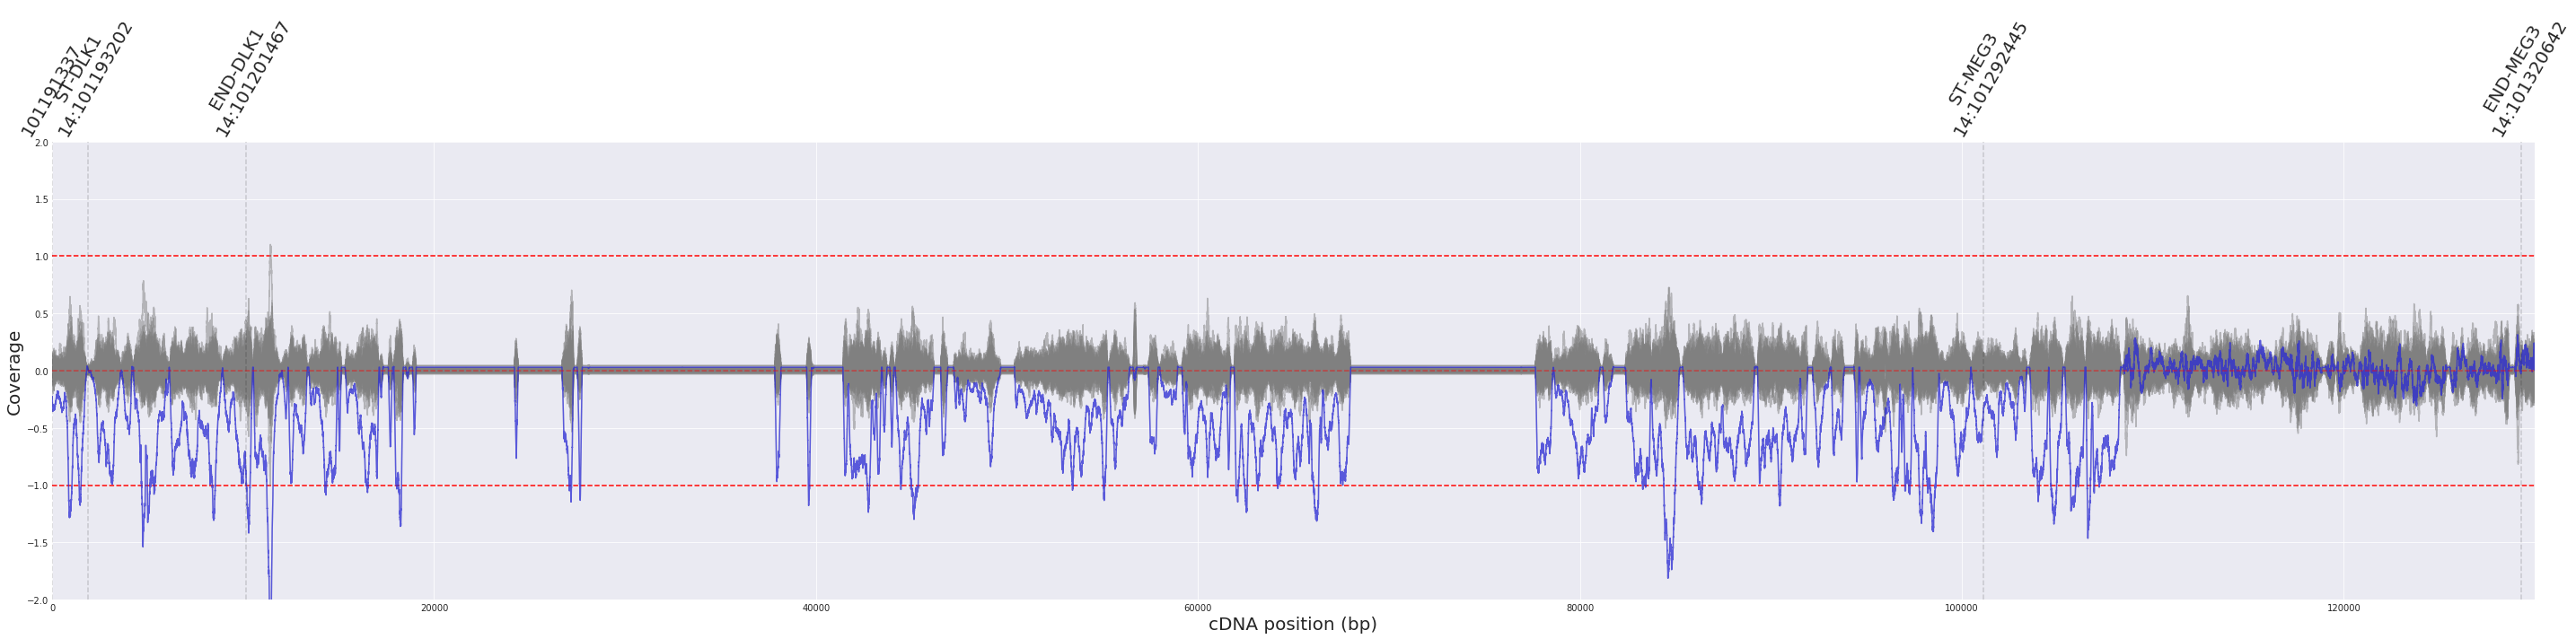

In [10]:
dff["index"] = dff.index

    # Create a plot per gene
fig = plt.figure(figsize=(40,10))
ax1 = fig.add_subplot(111)
for el in list_samples:
    ax1.plot(dff['index'], dff[el], alpha=0.5, color='gray')
ax1.plot(dff['index'], dff['17NR2154'], alpha=0.5, color='blue')
ax1.plot(dff["index"], dff["mean"], alpha=0.5, color='r', linestyle='--')
    # Plot limits
ax1.set_ylim(-2, 2)
ax1.set_xlim(0, dff['index'].max() + 1)
#ax1.set_xlim(105000, dfg['index'].max() + 1)
ax1.hlines(y=1, xmin=ax1.get_xlim()[0], xmax=ax1.get_xlim()[-1], color='r', linestyle='--')
ax1.hlines(y=-1, xmin=ax1.get_xlim()[0], xmax=ax1.get_xlim()[-1], color='r', linestyle='--')

    # Getting positions to plot vertical lines separating exons
index_positions = [0, 1865, 10130, 101108, 129306]
names = ['101191337', 'ST-DLK1\n14:101193202', 'END-DLK1\n14:101201467', 'ST-MEG3\n14:101292445', 'END-MEG3\n14:101320642']
        
    # Set limits for the vertical lines, it is a plot on top of a plot
ax2 = ax1.twiny()
ax2.set_ylim(ax1.get_ylim())
ax2.set_xlim(ax1.get_xlim())

    # Paint vertical lines, we use [1:] because the first point is always zero
ax2.vlines(x=index_positions, ymin=-2, ymax=ax2.get_ylim()[1], linestyle='--', 
            alpha=0.15)
ax2.grid(b=False)
ax2.set_xticks(index_positions)
ax2.set_xticklabels(names, rotation=60, minor=False, fontsize=20)

ax1.set_xlabel('cDNA position (bp)', fontsize=20)
ax1.set_ylabel('Coverage', fontsize=20)


fig.tight_layout()
#figname = "{}_pbcov.png".format(gene)
figname = "DLK1-17NR2154-numreads-zscore.png"
fig.savefig(os.path.join("./", figname))
plt.show()
plt.close(fig)